# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import os


dataframe1 = pd.read_csv("kidney_disease.csv")


# Loading data from local machine in xlsx and json format
dataframe2 = pd.read_excel("kidney_disease.xlsx")
dataframe3 = pd.read_json("kidney_disease.json")


merge = pd.merge(dataframe1[["id", "age", "bp", "sg", "al", "su", "rbc", "pc"]], # taking initial 7 columns from dataframe1
                 dataframe2[["id", "pcc", "ba", "bgr", "bu","sc","sod","pot", "hemo", "pcv", "wc", "rc"]], # Another 11 columns from data 2
                 on = "id"
                 )

final_data = pd.merge(merge, # taking first merge
                      dataframe3[["id", "htn", "dm", "cad", "appet", "pe", "ane", "classification"]],
                      on = "id"
                      )


final_data.head()

# Getting number of rows and columns
print("\n\nNumber of rows: {}".format(final_data.shape[0]))
print("Number of Columns: {}".format(final_data.shape[1]))



Number of rows: 400
Number of Columns: 26


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [2]:
# Getting number of unique values in each columns
#final_data["id"].unique()
for col in list(final_data):
  print("Number of unique in column {} are {}".format(col, len(final_data[col].unique())))

# We will not consider unique values of id columns
# We will find out the columns with maximum diversity 
max_val_col = None
max_val = 0
for col in list(final_data):
  if col!="id" and len(final_data[col].unique())>max_val:
    max_val_col = col
    max_val =  len(final_data[col].unique())

print("\n\nThe {} column has maximum diversity and number of uniqe values is {}".format(max_val_col, max_val))

# if we see, the classification is shown to have 3 unique value but it should have 2 only
print("The unique value of classification are {}".format(final_data["classification"].unique()))

#Now we will replace "ckd" with "ckd\t"
final_data["classification"] = final_data["classification"].replace("ckd\t", "ckd")

Number of unique in column id are 400
Number of unique in column age are 77
Number of unique in column bp are 11
Number of unique in column sg are 6
Number of unique in column al are 7
Number of unique in column su are 7
Number of unique in column rbc are 3
Number of unique in column pc are 3
Number of unique in column pcc are 3
Number of unique in column ba are 3
Number of unique in column bgr are 147
Number of unique in column bu are 119
Number of unique in column sc are 85
Number of unique in column sod are 35
Number of unique in column pot are 41
Number of unique in column hemo are 116
Number of unique in column pcv are 43
Number of unique in column wc are 91
Number of unique in column rc are 49
Number of unique in column htn are 3
Number of unique in column dm are 6
Number of unique in column cad are 4
Number of unique in column appet are 3
Number of unique in column pe are 3
Number of unique in column ane are 3
Number of unique in column classification are 3


The bgr column has 

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
# Checking if there is any row in which all values are same(Data Redundancy)\
# FIrst we will check with null values, later we will check by removing null values
found = False
for col in list(final_data):
  # if number of unique values is 1, then there is same data in every column
  if len(final_data[col].unique()) == 1:
    print("The {} Column contains same value. The value is {}. (Analysis including NA values)".format(col, final_data[col][0]))
    found = True
if not found:
  print("No column which contains single values. (Analysis including NA values).")


found = False
for col in list(final_data):
  # if number of unique values is 1, then there is same data in every column
  column = final_data[col]
  column = column.dropna(how = "any")
  if len(column.unique()) == 1:
    print("The {} Column contains same value. The value is {}. (Analysis after removing NA values)".format(col, column[0]))
    found = True
if not found:
  print("No column which contains single values. (Analysis after removing NA values).")

No column which contains single values. (Analysis including NA values).
No column which contains single values. (Analysis after removing NA values).


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

'\nWe can see that people of Age near 60 are more prone to CKD.\n'

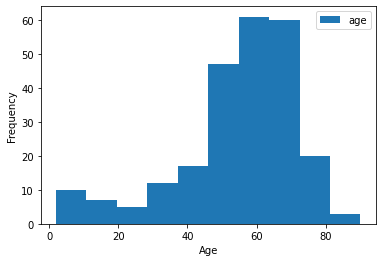

In [4]:
import matplotlib.pyplot as plt
#plotting the histogram with age

ax = final_data[final_data["classification"] == "ckd"].age.dropna(how = "any").plot.hist(legend = True)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.plot()

'''
We can see that people of Age near 60 are more prone to CKD.
'''

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

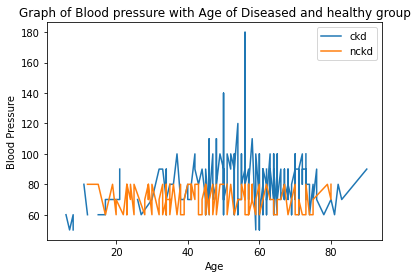

'\nWe can see that blood pressure of healthy person remains constant with age, but blood pressure of person with CKD increases with Age.\nAnd we can also see that average blood pressure of diseased group is higher.\n'

In [5]:
# Now we will see the blood pressure with age of people with CKD and notCKD
plot_data = final_data[["age", "bp", "classification"]]
ckd_data = final_data[final_data["classification"] == "ckd"][["age", "bp"]]
nckd_data = final_data[final_data["classification"] != "ckd"][["age", "bp"]]

ckd_data = ckd_data.sort_values(by = "age")
nckd_data = nckd_data.sort_values(by = "age")
plt.plot(ckd_data["age"], ckd_data["bp"], label = "ckd")
plt.plot(nckd_data["age"], nckd_data["bp"], label = "nckd")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("Graph of Blood pressure with Age of Diseased and healthy group")

plt.legend()
plt.show()

'''
We can see that blood pressure of healthy person remains constant with age, but blood pressure of person with CKD increases with Age.
And we can also see that average blood pressure of diseased group is higher.
'''

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [6]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [7]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push

Updating 5e30a66..cc32f5d
Fast-forward
 week09/feedback.md | 3 +++
 1 file changed, 3 insertions(+)
 create mode 100644 week09/feedback.md
[main 128ba5c] Submitting the week 12 assignment
 2 files changed, 415 insertions(+), 2 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb


From github.com:ajithkumar-07/hds5210-2021
   5e30a66..cc32f5d  main       -> origin/main
remote: This repository moved. Please use the new location:        
remote:   git@github.com:AjithKumar-07/hds5210-2021.git        
To github.com:ajithkumar-07/hds5210-2021.git
   cc32f5d..128ba5c  main -> main



---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.